# Q 1 Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
airlines=pd.read_csv('https://raw.githubusercontent.com/nevased/Data-Set-for-Assignment/main/EastWestAirlines.csv')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airlines.shape

(3999, 12)

In [6]:
airlines.isna().sum() 

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Hierarchical Clustering

In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(airlines.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


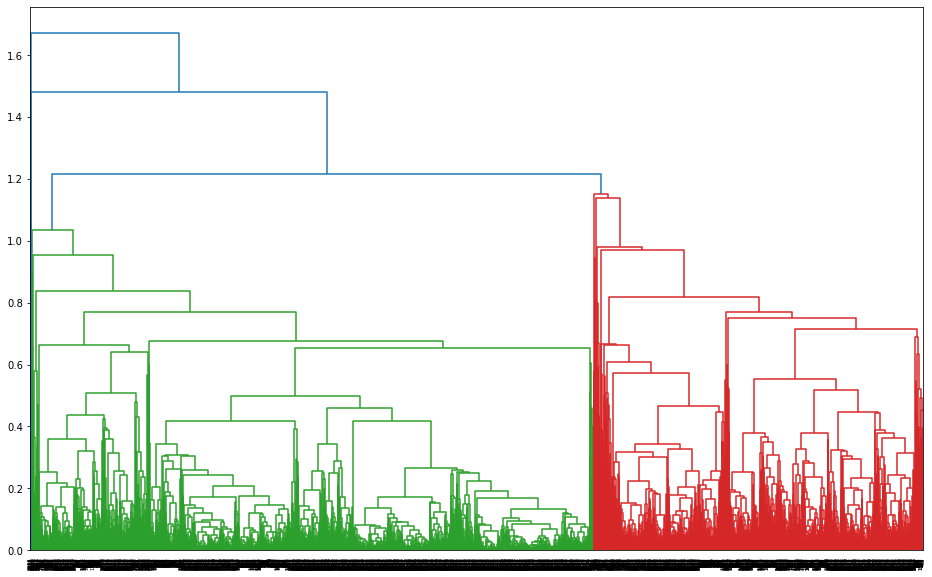

In [10]:
# create dendrogram
plt.figure(figsize = (16, 10));
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [11]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [12]:
# Save Clusters for Chart 
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [13]:
df_norm['h_clusterid'] = Clusters

In [14]:
df_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.00,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1505,0.229478,0.000000,0.50,0.0,0.00,0.104181,0.232558,0.051919,0.132075,0.591150,1.0,0
1503,0.297607,0.000000,0.75,0.0,0.00,0.196314,0.209302,0.014602,0.018868,0.574873,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.00,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
1501,0.031743,0.165590,0.50,0.0,0.00,0.132723,0.162791,0.000000,0.000000,0.584278,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.056678,0.106028,0.00,0.0,0.50,0.186052,0.302326,0.074634,0.169811,0.812153,1.0,4
1946,0.074419,0.000000,0.75,0.0,1.00,0.362546,0.372093,0.016225,0.018868,0.467567,1.0,4
2364,0.063397,0.000000,1.00,0.0,1.00,0.822974,0.279070,0.000000,0.000000,0.429829,1.0,4
1878,0.075258,0.000000,1.00,0.0,0.75,0.501595,0.372093,0.012980,0.037736,0.494454,1.0,4


In [15]:
airlines['h_clusterid'] = Clusters
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [16]:
airlines.sort_values("h_clusterid")

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1505,1520,391222,0,3,1,1,27471,20,1600,7,4905,1,0
1503,1518,507371,0,4,1,1,51765,18,450,1,4770,1,0
3165,3187,194816,0,1,1,1,20822,25,6647,12,2424,1,0
1501,1516,54116,1846,3,1,1,34997,14,0,0,4848,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,4
2364,2382,108081,0,5,1,5,217006,24,0,0,3567,1,4
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,4


# KMeans

In [17]:
airlines=pd.read_csv('https://raw.githubusercontent.com/nevased/Data-Set-for-Assignment/main/EastWestAirlines.csv')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airlines_df = scaler.fit_transform(airlines.iloc[:,1:])
scaled_airlines_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [19]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [20]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_airlines_df)

KMeans(n_clusters=4, random_state=0)

In [21]:
kmeans.inertia_

27161.537880165695

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airlines_df)
    wcss.append(kmeans.inertia_)
wcss

[43989.000000000095,
 35409.533633091225,
 30899.271221785595,
 27161.53788016569,
 23706.857170841227,
 21472.931605405152,
 18891.92670311129,
 17316.78205595397,
 15960.424188770648,
 14729.017715096095]

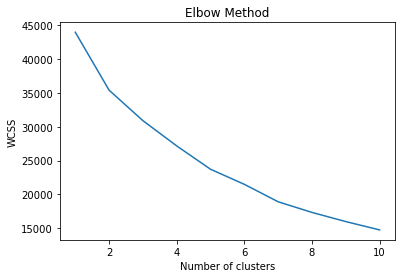

In [23]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(scaled_airlines_df)

KMeans(n_clusters=4, random_state=0)

In [25]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [26]:
#Assign clusters to the data set
airlines['clusterid_new'] = clusters_new.labels_

In [27]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 1.16774007,  1.02758112,  0.08768326,  0.13804679, -0.06276658,
         0.58007347,  1.55085819,  3.43518798,  3.68477621,  0.27107819,
         0.90660632],
       [ 0.42688072, -0.01776242,  1.20523916, -0.08210144, -0.05462914,
         0.92464348,  0.75164961, -0.09243801, -0.10290123,  0.37121684,
         0.57361488],
       [-0.29294552, -0.05997437, -0.60627062,  0.0317647 , -0.06076011,
        -0.51374624, -0.48523058, -0.18604476, -0.19785519, -0.20273621,
        -0.34593824],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [28]:
airlines.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1740.511628,191266.395349,939.017442,2.180233,1.034884,1.000000,31152.430233,26.494186,5269.436047,15.348837,4678.302326,0.808140
1,1,1601.602381,116567.580159,133.407937,3.717460,1.002381,1.001587,39457.994444,18.813492,330.376984,0.982540,4884.288889,0.647619
2,2,2239.382053,44078.298197,96.209639,1.224530,1.019201,1.000392,4732.770768,6.940831,199.664969,0.623433,3699.858542,0.202978
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [29]:
airlines.groupby('clusterid_new').mean()
airlines


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [30]:
airlines[airlines['clusterid_new']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,3
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,3
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,3
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,3
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,3
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,3
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,3
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,3
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,3
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,3


In [31]:
airlines[airlines['clusterid_new']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,0
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,0
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,0
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,0
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,0
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,0
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,0


In [32]:
airlines.sort_values('clusterid_new')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
1262,1275,11494,0,1,1,1,8425,15,4700,11,5487,1,0
3429,3452,133351,0,5,1,1,84215,43,7000,22,1529,1,0
1623,1638,194949,0,1,1,1,10121,13,4621,10,4930,1,0
360,365,22080,0,1,1,1,12200,47,1950,9,7050,1,0
1620,1635,276607,0,1,1,1,11430,14,6430,11,4791,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,3
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,3
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,3
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,3


In [33]:
airlines['clusterid_new'].value_counts()

2    2552
1    1260
0     172
3      15
Name: clusterid_new, dtype: int64

# DBSCAN

In [34]:
airlines=pd.read_csv("https://raw.githubusercontent.com/nevased/Data-Set-for-Assignment/main/EastWestAirlines.csv")
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


<AxesSubplot:>

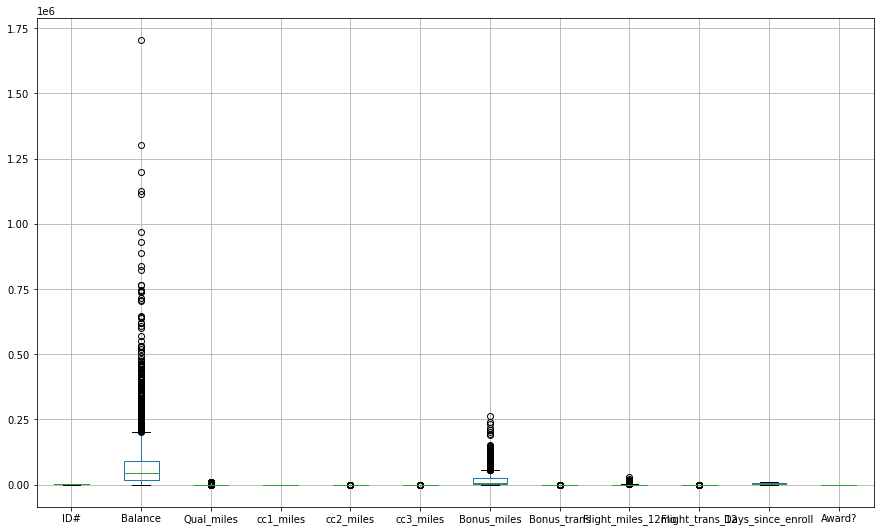

In [35]:
plt.figure(figsize=(15,9))
airlines.boxplot()

C:\Users\Dell\anaconda3\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1183: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1


<AxesSubplot:>

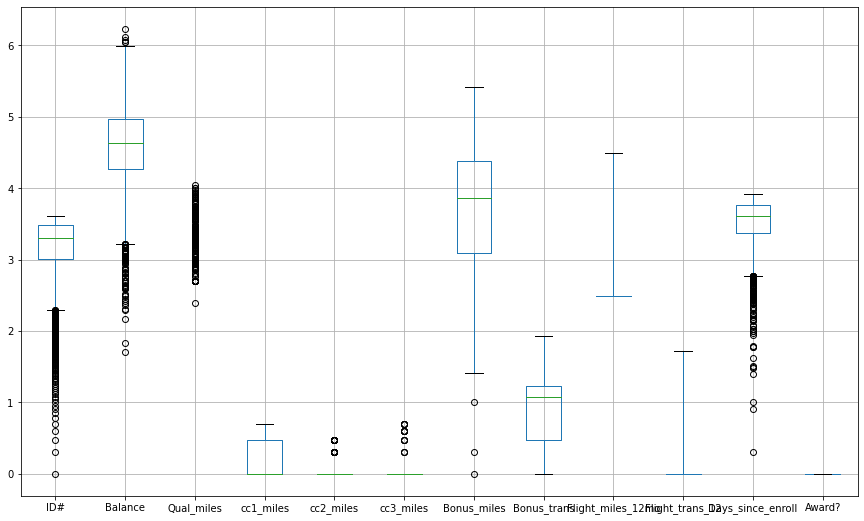

In [36]:
plt.figure(figsize=(15,9))
airlines.apply(np.log10).boxplot()

In [37]:
array = airlines.values

In [38]:
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [39]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [40]:
min_samples=4
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [41]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [42]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,0


In [43]:
clustered = pd.concat([airlines,cl],axis=1)

In [44]:
clustered[clustered['cluster']==-1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,-1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,23,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,3979,47301,1005,1,1,1,4561,4,0,0,1464,0,-1
3961,3984,131125,862,1,1,1,4993,11,50,1,1443,0,-1
3967,3990,26504,0,2,1,1,10599,29,1000,7,1445,0,-1
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,-1


In [45]:
clustered

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [46]:
clustered.mean()

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
cluster                  0.031758
dtype: float64

In [47]:
clustered.sort_values('cluster')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,-1
806,816,83105,0,4,1,1,65077,28,753,3,6137,1,-1
807,817,152063,0,4,1,1,34257,19,1100,3,6159,1,-1
3366,3389,61841,0,1,1,1,48700,49,0,0,1659,1,-1
1620,1635,276607,0,1,1,1,11430,14,6430,11,4791,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,3642,46207,0,3,1,1,16093,32,0,0,1130,0,6
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,6
3860,3883,35650,0,3,1,1,23130,34,0,0,1640,0,6
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,6


In [48]:
clustered['cluster'].value_counts()

 0    2159
-1     919
 1     878
 3      16
 5       8
 6       7
 4       7
 2       5
Name: cluster, dtype: int64

# Q 2 Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [49]:
crime=pd.read_csv('https://raw.githubusercontent.com/nevased/Data-Set-for-Assignment/main/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [50]:
crime=crime.rename({'Unnamed: 0':'States'},axis=1)

In [51]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [52]:
crime.shape

(50, 5)

In [53]:
crime.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [54]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# Hierarchical Clustering

In [55]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [56]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


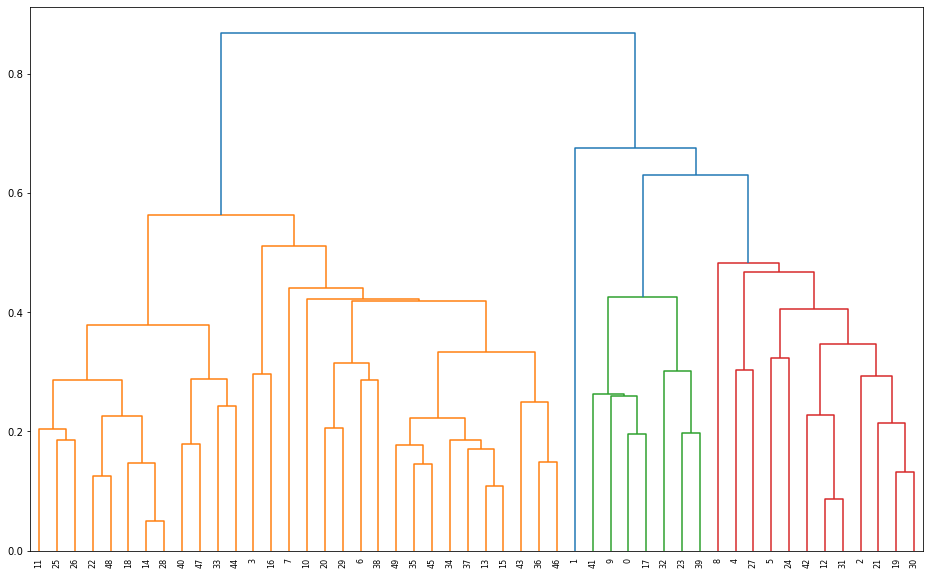

In [57]:
# create dendrogram
plt.figure(figsize = (16, 10));
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [58]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [59]:
# Save Clusters for Chart 
y_hc1 = hc1.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])
Clusters

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [60]:
df_norm['h_clusterid'] = Clusters

In [61]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
49,0.361446,0.397260,0.474576,0.214470,0
29,0.397590,0.390411,0.966102,0.297158,0
16,0.536145,0.219178,0.338983,0.232558,0
15,0.313253,0.239726,0.576271,0.276486,0
34,0.391566,0.256849,0.728814,0.364341,0
13,0.385542,0.232877,0.559322,0.354005,0
35,0.349398,0.363014,0.610169,0.328165,0
36,0.246988,0.390411,0.593220,0.568475,0
20,0.216867,0.356164,0.898305,0.232558,0
10,0.271084,0.003425,0.864407,0.333333,0


In [62]:
crime['h_clusterid'] = Clusters
crime

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [63]:
crime.sort_values('h_clusterid')

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
49,Wyoming,6.8,161,60,15.6,0
29,New Jersey,7.4,159,89,18.8,0
16,Kentucky,9.7,109,52,16.3,0
15,Kansas,6.0,115,66,18.0,0
34,Ohio,7.3,120,75,21.4,0
13,Indiana,7.2,113,65,21.0,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0
20,Massachusetts,4.4,149,85,16.3,0
10,Hawaii,5.3,46,83,20.2,0


# KMeans

In [64]:
crime=pd.read_csv('https://raw.githubusercontent.com/nevased/Data-Set-for-Assignment/main/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [65]:
crime=crime.rename({'Unnamed: 0':'States'},axis=1)
crime

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [66]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:])
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [67]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=0)

In [68]:
kmeans.inertia_

57.55425863091106

In [69]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
wcss

[200.0,
 104.96163315756873,
 80.08569526137276,
 57.55425863091106,
 50.33327385184908,
 44.200843606869185,
 39.68379510054722,
 34.69690734673086,
 30.87662061527529,
 28.590635505950253]

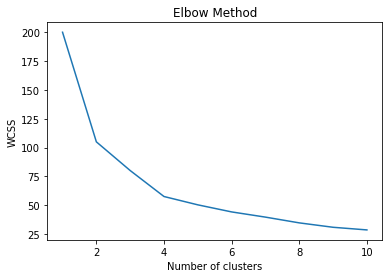

In [70]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [71]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=0)

In [72]:
clusters_new.labels_

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2])

In [73]:
#Assign clusters to the data set
crime['clusterid_new'] = clusters_new.labels_

In [74]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [75]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,10.815385,257.384615,76.000000,33.192308
2,2,5.656250,138.875000,73.875000,18.781250
3,3,3.600000,78.538462,52.076923,12.176923


In [76]:
crime.groupby('clusterid_new').mean()
crime

,States,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,0


In [77]:
crime[crime['clusterid_new']==3]

,States,Murder,Assault,UrbanPop,Rape,clusterid_new
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
16,Kentucky,9.7,109,52,16.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3


In [78]:
crime[crime['clusterid_new']==0]

,States,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
3,Arkansas,8.8,190,50,19.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [79]:
crime.sort_values('clusterid_new')

,States,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
41,Tennessee,13.2,188,59,26.9,0
3,Arkansas,8.8,190,50,19.5,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
9,Georgia,17.4,211,60,25.8,0
23,Mississippi,16.1,259,44,17.1,0
17,Louisiana,15.4,249,66,22.2,0
42,Texas,12.7,201,80,25.5,1
31,New York,11.1,254,86,26.1,1


In [80]:
crime['clusterid_new'].value_counts()

2    16
3    13
1    13
0     8
Name: clusterid_new, dtype: int64

# DBSCAN

In [81]:
crime=pd.read_csv('https://raw.githubusercontent.com/nevased/Data-Set-for-Assignment/main/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [82]:
crime=crime.rename({'Unnamed: 0':'States'},axis=1)
crime


,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


<AxesSubplot:>

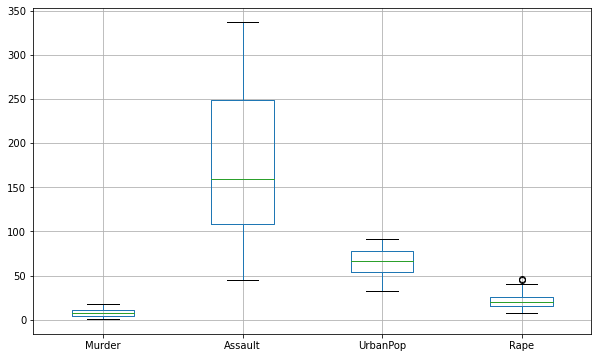

In [83]:
plt.figure(figsize=(10,6))
crime.boxplot()

In [84]:
array = crime.iloc[:,1:].values

In [85]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [86]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [87]:
min_samples=4
dbscan = DBSCAN(eps=0.95, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.95, min_samples=3)

In [88]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  4,  3,  4,  1,  0, -1,  1,  1, -1,  1,  3,  4,  2, -1,  1,
        1,  1,  3,  1, -1,  0,  1,  0,  2,  3, -1,  1,  3,  1,  1,  1],
      dtype=int64)

In [89]:
c2 = pd.DataFrame(dbscan.labels_,columns=['cluster'])
c2

,cluster
0,0
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,0


In [90]:
clustered = pd.concat([crime,cl],axis=1)

In [91]:
clustered[clustered['cluster']==-1]

,States,Murder,Assault,UrbanPop,Rape,cluster
4,California,9.0,276.0,91.0,40.6,-1
8,Florida,15.4,335.0,80.0,31.9,-1
9,Georgia,17.4,211.0,60.0,25.8,-1
21,Michigan,12.1,255.0,74.0,35.1,-1
22,Minnesota,2.7,72.0,66.0,14.9,-1
...,...,...,...,...,...,...
3956,NaN,NaN,NaN,NaN,NaN,-1
3961,NaN,NaN,NaN,NaN,NaN,-1
3967,NaN,NaN,NaN,NaN,NaN,-1
3979,NaN,NaN,NaN,NaN,NaN,-1


In [92]:
clustered

,States,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236.0,58.0,21.2,0
1,Alaska,10.0,263.0,48.0,44.5,0
2,Arizona,8.1,294.0,80.0,31.0,0
3,Arkansas,8.8,190.0,50.0,19.5,0
4,California,9.0,276.0,91.0,40.6,-1
...,...,...,...,...,...,...
3994,NaN,NaN,NaN,NaN,NaN,1
3995,NaN,NaN,NaN,NaN,NaN,1
3996,NaN,NaN,NaN,NaN,NaN,1
3997,NaN,NaN,NaN,NaN,NaN,0


In [93]:
clustered.mean()

Murder        7.788000
Assault     170.760000
UrbanPop     65.540000
Rape         21.232000
cluster       0.031758
dtype: float64

In [94]:
clustered.sort_values('cluster')

,States,Murder,Assault,UrbanPop,Rape,cluster
1999,NaN,NaN,NaN,NaN,NaN,-1
806,NaN,NaN,NaN,NaN,NaN,-1
807,NaN,NaN,NaN,NaN,NaN,-1
3366,NaN,NaN,NaN,NaN,NaN,-1
1620,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...
3619,NaN,NaN,NaN,NaN,NaN,6
3991,NaN,NaN,NaN,NaN,NaN,6
3860,NaN,NaN,NaN,NaN,NaN,6
3974,NaN,NaN,NaN,NaN,NaN,6


In [95]:

clustered['cluster'].value_counts()

 0    2159
-1     919
 1     878
 3      16
 5       8
 6       7
 4       7
 2       5
Name: cluster, dtype: int64